## Fast Fourier Transform

2. Visualize the data and the template

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import wavfile as wav
from scipy.fftpack import fft
%matplotlib inline

Sampling rate black hole: 4096 [samples/s]
Sampling rate black hole: 4096 [samples/s]
Sampling rate black hole template: 4096 [samples/s]


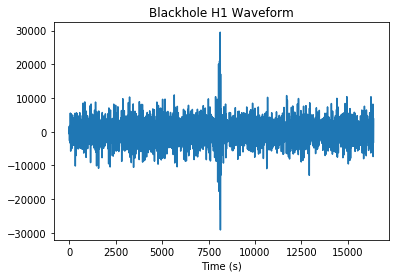

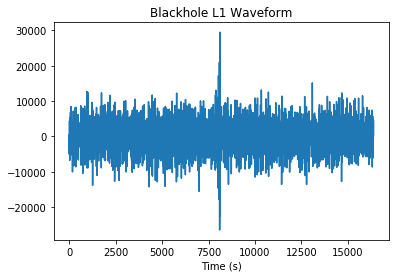

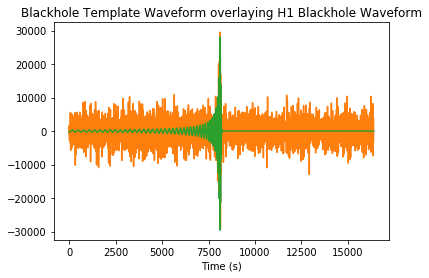

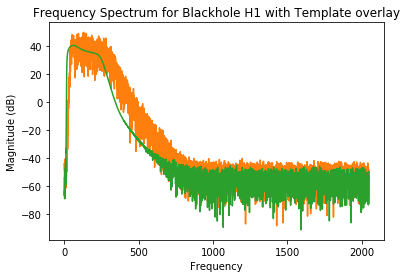

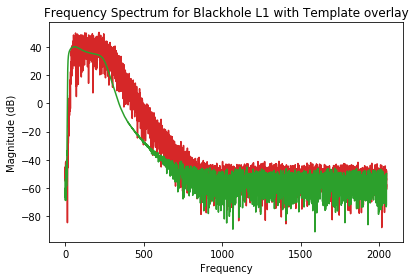

In [280]:
rate_bhH1, data_bhH1 = wav.read('GW150914_H1_whitenbp.wav')
rate_bhL1, data_bhL1 = wav.read('GW150914_L1_whitenbp.wav')
rate_bhtemplate, data_bhtemplate = wav.read('GW150914_template_whiten.wav')

#Sampling rates
print("Sampling rate black hole: " + str(rate_bhH1) + " [samples/s]")
print("Sampling rate black hole: " + str(rate_bhL1) + " [samples/s]")
print("Sampling rate black hole template: " + str(rate_bhtemplate) + " [samples/s]")

#Visualizing waveform
plt.plot(data_bhH1)
plt.title("Blackhole H1 Waveform")
plt.xlabel('Time (s)')

plt.figure()
plt.plot(data_bhL1)
plt.title("Blackhole L1 Waveform")
plt.xlabel('Time (s)')

plt.figure()
plt.plot(data_bhtemplate)
plt.title("Blackhole Template Waveform")
plt.xlabel('Time (s)')

#overlay of waveforms
plt.plot(data_bhH1)
plt.xlabel('Time (s)')

plt.plot(data_bhtemplate)
plt.title("Blackhole Template Waveform overlaying H1 Blackhole Waveform")
plt.xlabel('Time (s)')


#magnitude spectrums
plt.figure()
plt.magnitude_spectrum(data_bhH1, Fs=rate_bhH1, scale='dB', color='C1')
plt.title('Frequency Spectrum for Blackhole H1 with Template overlay')
plt.magnitude_spectrum(data_bhtemplate, Fs=rate_bhtemplate, scale='dB', color='C2')

plt.figure()
plt.magnitude_spectrum(data_bhL1, Fs=rate_bhL1, scale='dB', color='C3')
plt.title('Frequency Spectrum for Blackhole L1 with Template overlay')
#plt.xlim(0,4000)
plt.magnitude_spectrum(data_bhtemplate, Fs=rate_bhtemplate, scale='dB', color='C2')


plt.tight_layout()

Comparing the waveforms of the template versus the actual data, we see that the real data is much messier. There is a lot more noise surrounding the signal in the data than the template. The template shows a waveform that starts out oscillating at small magnitudes and then grows into the signal at ~7600 seconds. Then the waveform flatlines. The real data shows a lot more noise leading up to the signal. We don't see the same growing sinusoid form as we do in the template data. In the real data, there looks to be random oscillation before and after the signal. With the template waveform it is easier to see where the signal starts to grow, ~6250 seconds, and to see where it ends, ~8500. With the real data, it is very hard to tell where, if not impossible, to tell where the signal begins. We see the the signal that is clearly above the noise, but this does not give us any information on where the signal begins or ends exactly. 

For the frequency spectrums, once again the real data has much more noise than the template data. Particularly in the frequency range from 0 to ~500 Hz. After 500 Hz, the template spectrum becomes almost as noisy as the real data. From 0 to 500 Hz, the template spectrum has a very clean line showing the signal. The template spectrum has the same shape as the real data, however the template peak in the beginning comes slightly before the real data. The template peak also starts to fall slightly before the real data. 

To compare whether the template is a good model for the data I would try to find the error between the model and the template. 

## Exercise 2

In [281]:
# Compute the fast Fourier transforms of the waveforms
fft_out_bh = fft(data_bh)
fft_out_bhtemplate = fft(data_bhtemplate)

# Figure out how many samples total we have
len_bh = len(fft_out_bh)
len_bhtemplate = len(fft_out_bhtemplate)

# Amplitudes
amp_bh = 2.0/len_bh * np.abs(fft_out_bh[:len_bh//2])
amp_bhtemplate = 2.0/len_bhtemplate * np.abs(fft_out_bhtemplate[:len_bhtemplate//2])

Text(0, 0.5, 'Amplitude (log)')

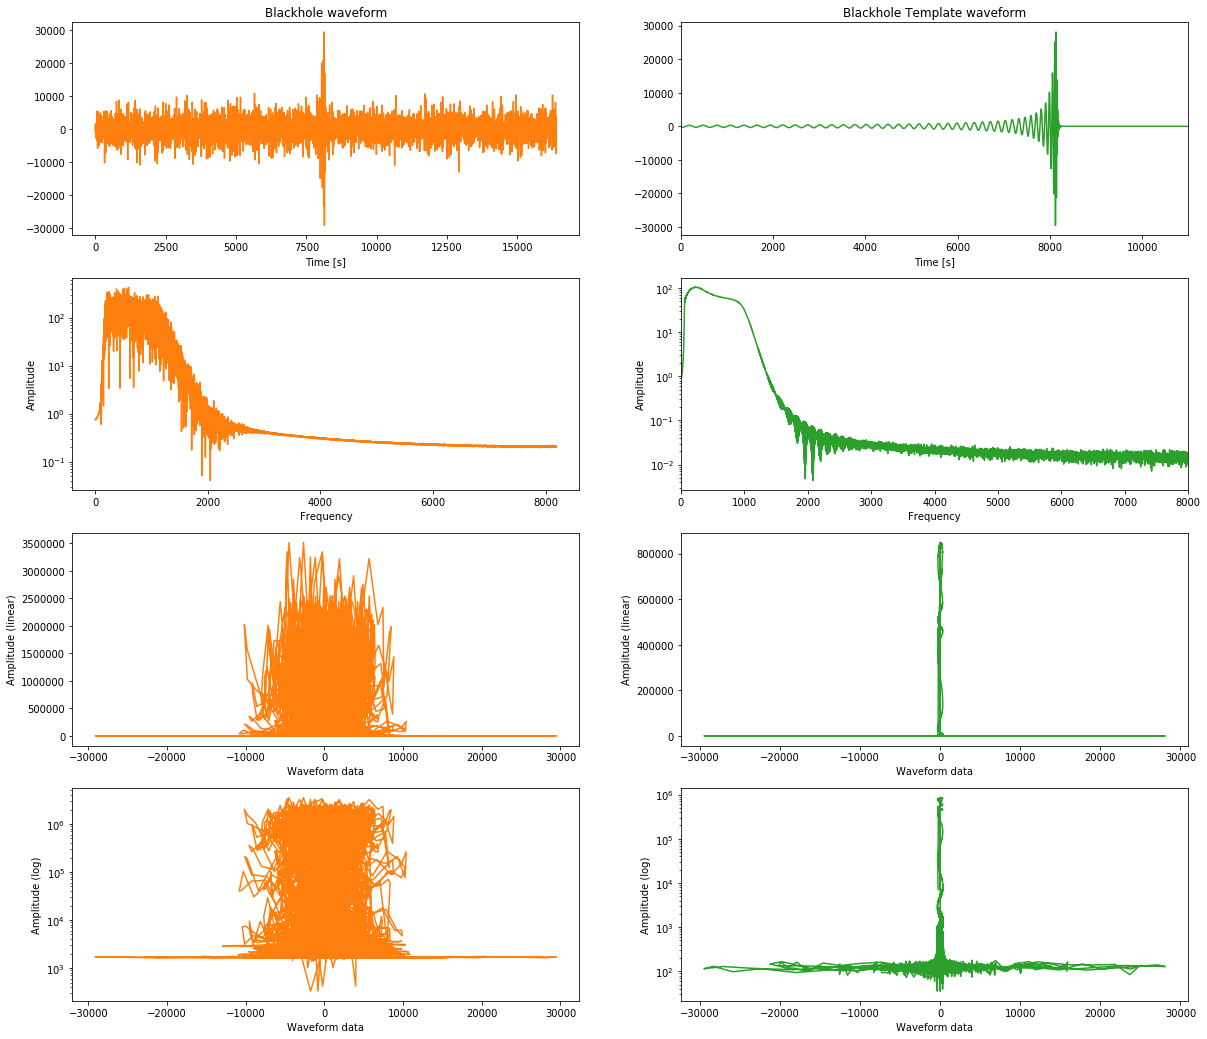

In [282]:
fig,axes = plt.subplots(ncols=2, nrows=4, figsize=(20,18))

colorA = 'C1'
colorB = 'C2'

# Plot the waveforms themselves
axes[0, 0].plot(data_bh, color=colorA)
axes[0, 0].set_title("Blackhole waveform")
axes[0, 0].set_xlabel("Time [s]")

axes[0, 1].plot(data_bhtemplate, color=colorB)
axes[0, 1].set_title("Blackhole Template waveform")
axes[0, 1].set_xlabel("Time [s]")
axes[0, 1].set_xlim(0, 11000)

time_step=1/4096
#sample_freq = fftfreq(amp_bh.size, d=time_step)
# Plot the amplitude of the Fourier components
axes[1, 0].semilogy(amp_bh, color=colorA)
axes[1, 0].set_xlabel("Frequency")
axes[1, 0].set_ylabel("Amplitude")

axes[1, 1].semilogy(amp_bhtemplate, color=colorB)
axes[1, 1].set_xlabel("Frequency")
axes[1, 1].set_ylabel("Amplitude")
axes[1, 1].set_xlim(0, 8000)

# Plot the amplitudes of the waveforms as a function of the amplitude of the Fourier components
axes[2, 0].plot(data_bh, np.abs(fft_out_bh), color=colorA)
axes[2, 0].set_xlabel("Waveform data")
axes[2, 0].set_ylabel("Amplitude (linear)")

axes[3, 0].semilogy(data_bh, np.abs(fft_out_bh), color=colorA)
axes[3, 0].set_xlabel("Waveform data")
axes[3, 0].set_ylabel("Amplitude (log)")

# Plot the amplitudes of the waveforms as a function of the amplitude of the Fourier components
axes[2, 1].plot(data_bhtemplate, np.abs(fft_out_bhtemplate), color=colorB)
axes[2, 1].set_xlabel("Waveform data")
axes[2, 1].set_ylabel("Amplitude (linear)")

axes[3, 1].semilogy(data_bhtemplate, np.abs(fft_out_bhtemplate), color=colorB)
axes[3, 1].set_xlabel("Waveform data")
axes[3, 1].set_ylabel("Amplitude (log)")


#plt.tight_layout()

## Quantitatively evaluate the model and the data

In [89]:
def my_uniform_chisq(bin_values, bin_expectations):
    num_bins = len(bin_values)
    chi_square = sum( ( ((bin_values[i] - bin_expectations[i])**2) / bin_expectations[i] ) for i in range(num_bins))
    return(chi_square)

In [117]:
import scipy.stats as stat
from scipy.fftpack import fftfreq
from scipy.fftpack import fft, ifft

chisq=stat.chisquare(amp_bh, f_exp=amp_bhtemplate)

print('Chisquared calculated by scipy.stats',chisq[0]/dof)

Chisquared calculated by scipy.stats 76.78842840847176


In [284]:
bin_values=amp_bh
bin_expectations=amp_bhtemplate

chisq = my_uniform_chisq(bin_values,bin_expectations)
print('My chisquared',chisq)

dof=len(amp_bh)-1
reducedchisq=chisq/dof
print('My reduced chisquared', reducedchisq)

My chisquared 628974.0170937936
My reduced chisquared 76.78842840847193


The chisquared is typically used for distributions. I have used it here as a method of quantifying the difference between the template and the real data. Our reduced chisquared, calculated both manually and with the scipy chisquared gives us 76.8. This is not an ideal value for chisquared, but it gives us somewhat of a sense of how the data and template compare. The data has lots of noise, so this is contributing to the large chisquared value. Since we are looking at the distance between the template and the real data at every point, the noise is adding big values to the sum of all the differences. We have normalized the differences in the sum by dividing by the template value at each point. Dividing by the degrees of freedom gives us the reduced chisquared value from the chisquared value. The reduced chisquared value is easier to interpret because it is taking into account how many points we have looked at. 

Text(0.5, 1.0, 'Difference between amplitudes of data and template at each frequency')

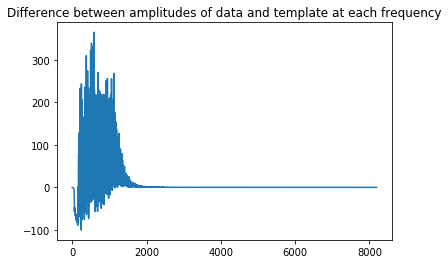

In [283]:
#difference between plot and template

diff=amp_bh-amp_bhtemplate
x=np.linspace(0,len(amp_bh), len(amp_bh))
plt.plot(x,diff)
plt.title('Difference between amplitudes of data and template at each frequency')

I have also plotted the difference between the amplitudes of the real data and the template data. There is a lot of difference from 0 to 2000. This makes sense since the beginning of the real data has a lot of noise before leveling off to lower amplitudes. 

## Cleaning up the data

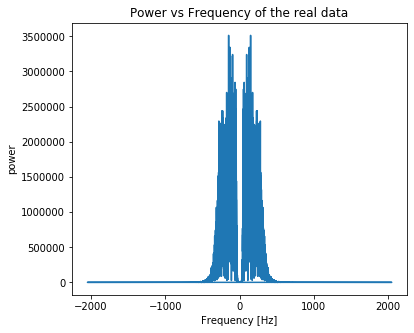

In [285]:
sig=data_bh
time_step=1/4096

# The FFT of the signal
sig_fft = fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
#plt.xlim(0,2000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.title('Power vs Frequency of the real data')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
#np.allclose(peak_freq, 1./period)



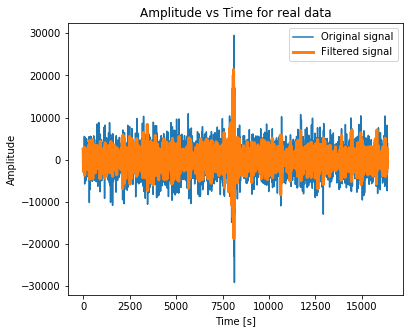

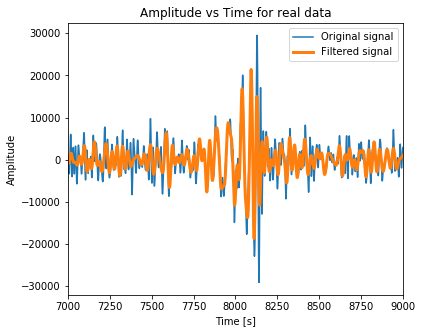

In [287]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = ifft(high_freq_fft)

time_vec = np.arange(0, 8000, time_step)

#overall signal
plt.figure(figsize=(6, 5))
plt.plot(sig, label='Original signal')
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Amplitude vs Time for real data')
plt.legend(loc='best')
plt.show()

#zoomed in on signal
plt.figure(figsize=(6, 5))
plt.plot(sig, label='Original signal')
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(7000,9000)
plt.title('Amplitude vs Time for real data')
plt.legend(loc='best')
plt.show()

Here we are cutting of frequencies bigger than the peak frequency. The filtered signal is reducing the noise and appears to be capturing the signal well. There are some higher amplitudes that are being cut off. We will look at how the template signal looks after it has been cleaned with the same procedure to see how much information we are cutting from the template. Ideally, we would want our cleaning procedure to cut none of the template, so this will gives us a good idea of whether we have chosen a cutoff frequency that is too low.

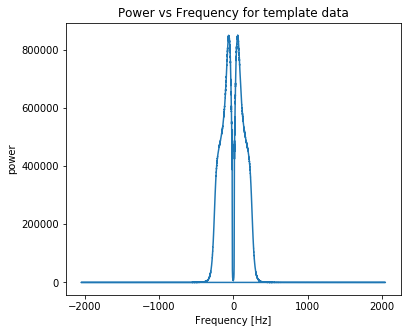

In [290]:
#checking signal cleanup with template
sig=data_bhtemplate
time_step=1/4096

# The FFT of the signal
sig_fft = fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
#plt.xlim(0,2000)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')
plt.title('Power vs Frequency for template data')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

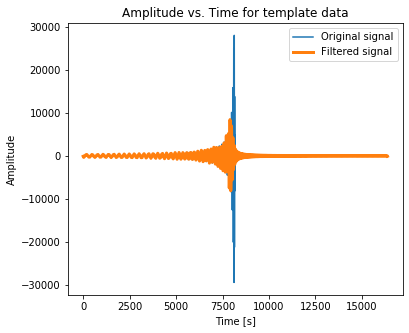

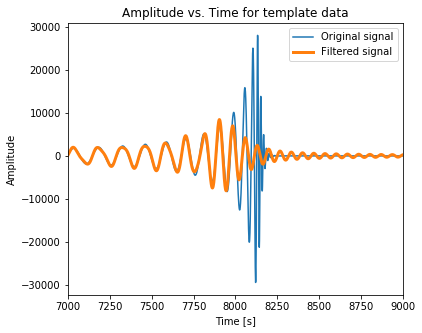

In [291]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = ifft(high_freq_fft)

time_vec = np.arange(0, 8000, time_step)

#overall signal
plt.figure(figsize=(6, 5))
plt.plot(sig, label='Original signal')
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.title('Amplitude vs. Time for template data')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()

#zoomed in signal
plt.figure(figsize=(6, 5))
plt.plot(sig, label='Original signal')
plt.title('Amplitude vs. Time for template data')
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(7000,9000)

plt.legend(loc='best')



Using the cutoff at peak frequency appears to cut much of our template signal. We see that the beginning of the signal is captured, but the higher amplitudes are not being captured. This indicates that we might want to increase the cutoff frequency to say 2 times the peak frequency. 

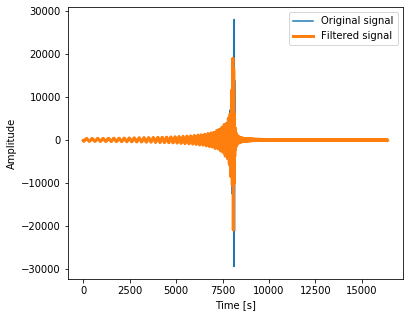

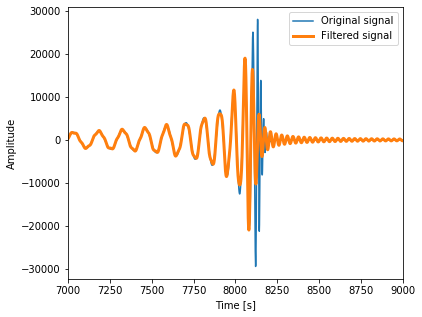

In [278]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > 2*peak_freq] = 0
filtered_sig = ifft(high_freq_fft)

time_vec = np.arange(0, 8000, time_step)

#overall signal
plt.figure(figsize=(6, 5))
plt.plot(sig, label='Original signal')
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()

#zoomed in signal
plt.figure(figsize=(6, 5))
plt.plot(sig, label='Original signal')
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(7000,9000)

plt.legend(loc='best')


Using 2 times the peak frequency captures much more of the higher amplitudes of our template signal. Now we can return to our real data and adjust the frequency cutoff. For the sake of time, I will not be implementing this. However, the procedure is simple for changing the cutoff frequency (simply multiply the peak frequency by two in the cutoff). 
high_freq_fft[np.abs(sample_freq) > 2*peak_freq] = 0

# Neural Networks

In [92]:
import numpy as np

def sigmoid(x,deriv=False):
    sig = 1/(1+np.exp(-x))
    if(deriv==True):
        return sig*(1-sig)
    return sig

learning_rate = 0.4

In [153]:
X = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1],[0,1,0]])

# output dataset           
y = np.array([[0,1,1,0,0]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
weights_0 = 2*np.random.random((3,1)) - 1
print(weights_0)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [247]:
# train the network with 50000 iterations
errorarrsigmoid=[]
for iter in range(500000):

    # forward propagation
    layer_0 = X
    layer_1_output = sigmoid(np.dot(layer_0,weights_0))

    # how much difference? This will be the error of 
    # our estimation and the true value
    layer1_error = y - layer_1_output
    errorarrsigmoid.append(layer1_error)
    # multiply how much we missed by the
    # slope of the sigmoid at the values at output layer
    # we also multiply the input to take care of the negative case
    layer1_delta = learning_rate * layer1_error * sigmoid(layer_1_output,True)
    layer1_delta = np.dot(layer_0.T,layer1_delta)

    # update weights by simply adding the delta
    weights_0 += layer1_delta

In [168]:
print("Output After Training:")
print(layer_1_output)
print('Target')
print(y)
print('Error', np.abs(layer_1_output-y))
print('weights',weights_0)

Output After Training:
[[2.42390258e-05]
 [9.99976885e-01]
 [9.99999999e-01]
 [5.87544611e-10]
 [2.42384382e-05]]
Target
[[0]
 [1]
 [1]
 [0]
 [0]]
Error [[2.42390258e-05]
 [2.31153512e-05]
 [5.60306468e-10]
 [5.87544611e-10]
 [2.42384382e-05]]
weights [[ 31.93006125]
 [-10.6275472 ]
 [-10.62752295]]


Our output is very close to our target values. We see that the error is of order of magnitude 10^(-5) or 10^(-9) when running it 50000. Our error improves to order of magnitude 10^(-10) and 10^(-5). The more runs we do, the better our error becomes. There is the danger of overfitting our weights. Let us check our weights on our training data. 

Now that we have trained our network on the above data, we will try to validate the weights with new data.

We are assuming the output is simply based on the first input. Here is the additional data:
[0,0,0],[1,0,0],[1,1,0]. We would expect the outputs to be [0],[1],[1]. 

In [172]:
layer_0=np.array([[0,0,0],[1,0,0],[1,1,0]])
print(weights_0)
layer_1_output = sigmoid(np.dot(layer_0,weights_0))
print(layer_1_output)

def perceptron (inputs, w, bias=0, activationfunc=sigmoid):
    return activationfunc(bias+np.dot(inputs,w))

print(perceptron(np.array([[0,0,0],[1,0,0],[1,1,0]]),weights_0))

[[ 31.93006125]
 [-10.6275472 ]
 [-10.62752295]]
[[0.5]
 [1. ]
 [1. ]]
[[0.5]
 [1. ]
 [1. ]]


Our weights work well when the expected value is 1. For expected value of 0, our weights always give 0.5. This is because the input was [0,0,0] and since we did not use a bias, our linear error function will always return 0. To obtain the correct value we would need to add in a bias. For the sake of time, I will not be implementing this.  

## Exercise 2

In [188]:
def mytanh(x,deriv=False):
    tanh = np.tanh(x)
    if(deriv==True):
        return 1-np.tanh(x)**2
    return tanh

learning_rate = 0.4


In [186]:
X = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1],[0,1,0]])

# output dataset           
y = np.array([[0,1,1,0,0]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
weights_0 = 2*np.random.random((3,1)) - 1
print(weights_0)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [212]:
# train the network with 50000 iterations

for iter in range(500000):

    # forward propagation
    layer_0 = X
    layer_1_output = mytanh(np.dot(layer_0,weights_0))

    # how much difference? This will be the error of 
    # our estimation and the true value
    layer1_error = y - layer_1_output

    # multiply how much we missed by the
    # slope of the sigmoid at the values at output layer
    # we also multiply the input to take care of the negative case
    layer1_delta = learning_rate * layer1_error * mytanh(layer_1_output,True)
    layer1_delta = np.dot(layer_0.T,layer1_delta)

    # update weights by simply adding the delta
    weights_0 += layer1_delta

In [209]:
print("Output After Training:")
print(layer_1_output)
print('Target')
print(y)
print('Error', np.abs(layer_1_output-y))
print('weights',weights_0)

Output After Training:
[[0.31609176]
 [0.37242898]
 [0.34457057]
 [0.34457057]]
Target
[[1]
 [1]
 [0]
 [0]]
Error [[0.68390824]
 [0.62757102]
 [0.34457057]
 [0.34457057]]
weights [[0.53210183]
 [0.09330526]
 [0.09330526]
 [0.30272296]]


Our error is very similar to our error for the sigmoid function. The magnitude of our error is 10^(-5) and 10^(-10). The error for our sigmoid function was slightly better because we had two values with error 10^(-10), where as for the tanh function we have only one of 10^(-10). 

XOR: output is 1 when number of 1 inputs is odd. 
    
[1,1,1] => [1], 
[0,0,1] => [1], 
[1,0,1] => [0],
[0,1,1]=> [0]



In [201]:
X = np.array([[1,1,1],[0,0,1],[1,0,1],[0,1,1]])
X = np.concatenate((np.ones((len(X), 1)), X), axis = 1)

# output dataset           
y = np.array([[1,1,0,0]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
weights_0 = 2*np.random.random((4,1)) - 1
print(weights_0)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]]


In [202]:
# train the network with 50000 iterations
for iter in range(500000):

    # forward propagation
    layer_0 = X
    layer_1_output = sigmoid(np.dot(layer_0,weights_0))

    # how much difference? This will be the error of 
    # our estimation and the true value
    layer1_error = y - layer_1_output

    # multiply how much we missed by the
    # slope of the sigmoid at the values at output layer
    # we also multiply the input to take care of the negative case
    layer1_delta = learning_rate * layer1_error * sigmoid(layer_1_output,True)
    layer1_delta = np.dot(layer_0.T,layer1_delta)

    # update weights by simply adding the delta
    weights_0 += layer1_delta

In [203]:
print("Output After Training:")
print(layer_1_output)
print('Target')
print(y)
print('Error', np.abs(layer_1_output-y))
print('weights',weights_0)

Output After Training:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
Target
[[1]
 [1]
 [0]
 [0]]
Error [[0.5]
 [0.5]
 [0.5]
 [0.5]]
weights [[ 1.14689432e-01]
 [ 4.16333634e-17]
 [-4.30211422e-16]
 [-1.14689432e-01]]


The neural network does not seem to work for the XOR logic gate. It returns 0.5 for each output. This is expected because the XOR inputs are not linearly separable. This makes it hard to separate the inputs into the proper classifications. To solve this problem we would need to add additional layers to our network. 

## Plotting error vs. iterations

In [243]:
#The training examples used are the same as in exercise 1, the output is based on the first number input in the training examples

X = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1],[0,1,0]])

# output dataset           
y = np.array([[0,1,1,0,0]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
weights_0 = 2*np.random.random((3,1)) - 1
print(weights_0)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [244]:
# train the network with 50000 iterations
errorarrtanh=[]
for iter in range(500000):

    # forward propagation
    layer_0 = X
    layer_1_output = mytanh(np.dot(layer_0,weights_0))

    # how much difference? This will be the error of 
    # our estimation and the true value
    layer1_error = y - layer_1_output
    errorarrtanh.append(layer1_error)
    # multiply how much we missed by the
    # slope of the sigmoid at the values at output layer
    # we also multiply the input to take care of the negative case
    layer1_delta = learning_rate * layer1_error * mytanh(layer_1_output,True)
    layer1_delta = np.dot(layer_0.T,layer1_delta)

    # update weights by simply adding the delta
    weights_0 += layer1_delta

In [245]:
print("Output After Training:")
print(layer_1_output)
print('Target')
print(y)
print('Error', np.abs(layer_1_output-y))
print('weights',weights_0)

Output After Training:
[[ 1.24998308e-06]
 [ 9.99997024e-01]
 [ 9.99997024e-01]
 [ 1.24998100e-06]
 [-2.08328986e-12]]
Target
[[0]
 [1]
 [1]
 [0]
 [0]]
Error [[1.24998308e-06]
 [2.97630861e-06]
 [2.97630861e-06]
 [1.24998100e-06]
 [2.08328986e-12]]
weights [[ 6.70898597e+00]
 [-2.08327172e-12]
 [ 1.24998058e-06]]


(-10, 50)

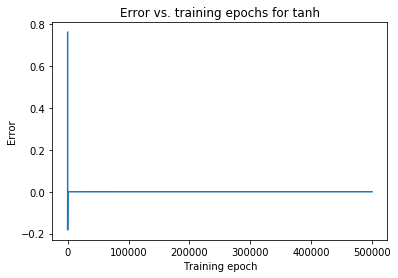

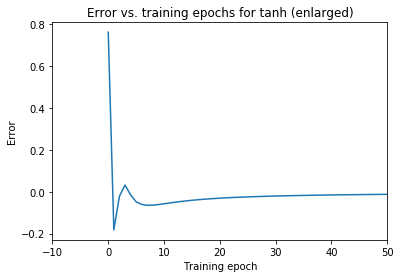

In [253]:
#error vs iterations plot for tanh
#Using 5 training examples and then plotting the error at each training epoch for the output of one example

errorarr2 = [item[0] for item in errorarrtanh]
plt.plot(errorarr2)
plt.title('Error vs. training epochs for tanh')
plt.xlabel('Training epoch')
plt.ylabel('Error')

plt.figure()
plt.plot(errorarr2)
plt.title('Error vs. training epochs for tanh (enlarged)')
plt.xlabel('Training epoch')
plt.ylabel('Error')
plt.xlim(-10,50)

We see that the error drops very quickly to near 0. It seems to level off at around 0 error after 30 training epochs. 

[array([-0.50000031]), array([-0.47656505]), array([-0.45469744]), array([-0.43438423]), array([-0.41556776]), array([-0.39816238]), array([-0.38206761]), array([-0.36717775]), array([-0.35338829]), array([-0.34059971])]


(-0.5, 0.1)

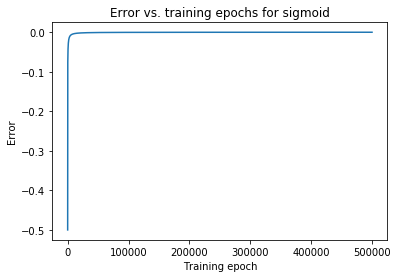

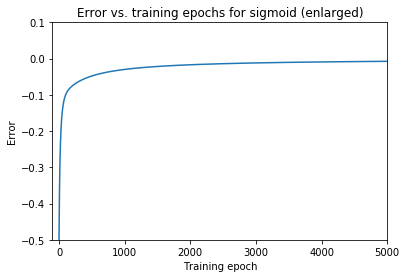

In [279]:
#error vs iterations plot for sigmoid
#Using 5 training examples and then plotting the error at each training epoch for the output of one example

errorarrsigmoid2 = [item[0] for item in errorarrsigmoid]
plt.plot(errorarrsigmoid2)
plt.title('Error vs. training epochs for sigmoid')
plt.xlabel('Training epoch')
plt.ylabel('Error')
print(errorarrsigmoid2[0:10])

plt.figure()
plt.plot(errorarrsigmoid2)
plt.title('Error vs. training epochs for sigmoid (enlarged)')
plt.xlabel('Training epoch')
plt.ylabel('Error')
plt.xlim(-100,5000)
plt.ylim(-0.5,0.1)

For the sigmoid function, the error does not drop as quickly as for the tanh function. After about epochs 4000, the curve also levels off at around 0. The tanh function seems to have a quicker transition to near 0 error. 